# Imports


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Data

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
11097


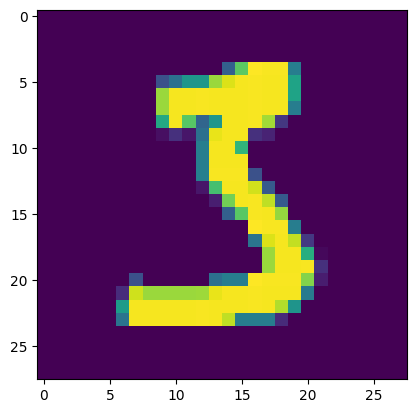

In [38]:
from keras.datasets import mnist
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
index = random.randint(0,X_train.shape[0])
print(index)
plt.imshow(X_train[index])
plt.show()

# Prepare data

In [45]:
# normalize data
X_train = X_train/255
X_test = X_test/255

#Reshape data
X_train = X_train.reshape(X_train.shape[0],-1) # -1 means it will multiply the rest of the shape
X_test = X_test.reshape(X_test.shape[0],-1)
print(X_train.shape,X_test.shape)

(60000, 784) (10000, 784)


# one hot encoding

In [40]:
Y_train = keras.utils.to_categorical(Y_train,10)
Y_test = keras.utils.to_categorical(Y_test,10)
print(Y_train.shape,Y_test.shape)
for i in range(10):
  print(Y_train[i])

(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#  **Model training**

In [42]:
# layers
model = Sequential()
model.add(Dense(units=128,input_shape=(784,),activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
model.fit(X_train,Y_train,batch_size=128,epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8113 - loss: 0.6435
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9514 - loss: 0.1608
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9675 - loss: 0.1082
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9759 - loss: 0.0801
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9821 - loss: 0.0605
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9845 - loss: 0.0521
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9860 - loss: 0.0434
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9884 - loss: 0.0350
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9904 - loss: 0.0319
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9917 - loss: 0.0252


# **Model Evaluating**

In [48]:
model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0930


[0.07602611929178238, 0.9786999821662903]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4208


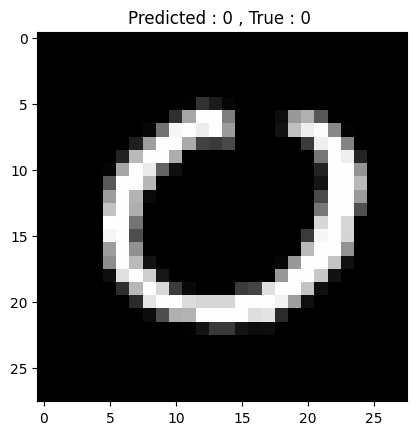

In [69]:
idx = random.randint(0,len(X_test))
img = X_test[idx,:]
pred = model.predict(img.reshape(1,-1))
prediction = np.argmax(pred)
True_label = np.argmax(Y_test[idx])
print(idx)
plt.title("Predicted : {} , True : {} ".format(prediction,True_label))
plt.imshow(X_test[idx].reshape(28,28),cmap='gray')
plt.show()